In [1]:
#Alllllll the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer


#### A 

In [3]:
df = pd.read_csv('LoanApprovalPrediction.csv')



In [4]:
#what columns have nulls in them
null_columns = df.isnull().sum()[df.isnull().sum() !=0].index


In [5]:
null_percent = (df.isnull().sum().loc[null_columns]/df.shape[0])*100

In [6]:
how_many_nulls = df.isnull().sum()[df.isnull().sum() !=0].values

In [7]:
columns_dtype = df.dtypes.loc[null_columns].values

In [8]:
null_info = pd.DataFrame({"null_columns":null_columns,
                         "how_many_nulls":how_many_nulls,
                         "columns_dtype":columns_dtype,
                        "null_percent" : null_percent}
                        )

In [9]:
null_info.reset_index(drop = True, inplace =True)

In [10]:
null_info = null_info.sort_values('null_percent')
null_info

,null_columns,how_many_nulls,columns_dtype,null_percent
0,Dependents,12,float64,2.006689
2,Loan_Amount_Term,14,float64,2.341137
1,LoanAmount,21,float64,3.511706
3,Credit_History,49,float64,8.193980


before we go on- make a copy of the data frame for later analysis call it `df_copy`

In [12]:
df_copy = df.copy()

If all the missing values are less then 10% you may use the KNN iputer to fill out the missing data.
Please make sure you only use numeric data and that you scale the data first. Use Standard Scaler

In [14]:
numeric_data = df.select_dtypes('number')
numeric_cols = df.select_dtypes('number').columns
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_data)

In [15]:
imputer = KNNImputer()
imputed =imputer.fit_transform (scaled)

In [16]:
inversed = scaler.inverse_transform(imputed)

In [17]:
df[numeric_cols] = inversed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    float64
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(6), object(7)
memory usage: 60.9+ KB


**Check the quality of the KNN imputatio**  

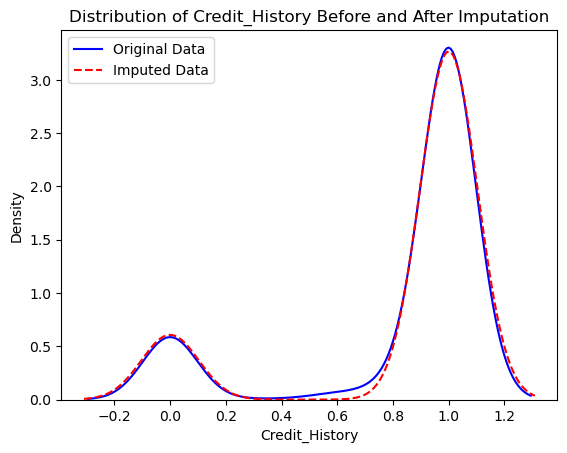

In [19]:
sns.kdeplot(df["Credit_History"].dropna(), label="Original Data", color="blue")
sns.kdeplot(df_copy["Credit_History"], label="Imputed Data", color="red", linestyle="dashed")
plt.title(f"Distribution of Credit_History Before and After Imputation")
plt.legend()

In [20]:
before = df_copy[null_columns].describe().loc["std"]
after = df[null_columns].describe().loc["std"]
pd.DataFrame({"before":before, "after" : after, "delta": (before-after)}).reset_index(drop =True)

,before,after,delta
0,1.007751,0.998281,0.009470
1,82.704182,81.683986,1.020196
2,65.205994,64.682065,0.523929
3,0.363800,0.352398,0.011402


##### B

In [40]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849.0,-2.273737e-13,165.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583.0,1.508000e+03,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000.0,-2.273737e-13,66.0,360.0,1.0,Urban,Y


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    float64
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(6), object(6)
memory usage: 56.2+ KB


In [48]:
df.select_dtypes('object').nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [50]:
#feature/Target
label_encoder = LabelEncoder()
df["Loan_Status"]= label_encoder.fit_transform(df["Loan_Status"])

In [52]:
X= df.drop("Loan_Status", axis =1)
y=df["Loan_Status"]

In [54]:
y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [58]:
 X.select_dtypes('object').columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [62]:
X.select_dtypes('number')

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849.0,-2.273737e-13,165.0,360.0,1.0
1,1.0,4583.0,1.508000e+03,128.0,360.0,1.0
2,0.0,3000.0,-2.273737e-13,66.0,360.0,1.0
3,0.0,2583.0,2.358000e+03,120.0,360.0,1.0
4,0.0,6000.0,-2.273737e-13,141.0,360.0,1.0
...,...,...,...,...,...,...
593,0.0,2900.0,-2.273737e-13,71.0,360.0,1.0
594,3.0,4106.0,-2.273737e-13,40.0,180.0,1.0
595,1.0,8072.0,2.400000e+02,253.0,360.0,1.0
596,2.0,7583.0,-2.273737e-13,187.0,360.0,1.0


In [60]:
categorial_cols = X.select_dtypes('object').columns#.tolist()
numeric_cols = X.select_dtypes('number').columns#.tolist()

In [66]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size =0.2, random_state =42,stratify =y )

In [68]:
#1 hot encode categories
ohe = OneHotEncoder (sparse_output=False)#,handle_unknown='ignore' )

In [72]:
#could have done before splitting
X_train_cat = ohe.fit_transform(X_train [categorial_cols] )
X_test_cat = ohe.fit_transform(X_test [categorial_cols] )

In [79]:
#new DF
X_train_cat = pd.DataFrame(X_train_cat , columns = ohe.get_feature_names_out(categorial_cols), index = X_train.index)
X_test_cat = pd.DataFrame(X_test_cat , columns = ohe.get_feature_names_out(categorial_cols), index = X_test.index)


In [83]:
X_train_cat.head(1)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
27,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [93]:
#scaling
scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns = numeric_cols, index = X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns = numeric_cols, index = X_test.index)

In [99]:
X_train_cat

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
27,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
443,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
127,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
400,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
279,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
486,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
331,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [101]:
X_train = pd.concat([X_train_num, X_train_cat], axis =1)
X_test =  pd.concat([X_test_num, X_test_cat], axis =1)

In [103]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
27,-0.771787,-0.641139,-0.579006,-1.314916,0.275339,0.445471,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
443,-0.771787,-0.243197,0.058500,0.013964,0.275339,-2.424273,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
127,-0.771787,2.332150,-0.579006,5.854039,2.157121,0.445471,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
400,0.218321,0.447881,-0.579006,0.048934,-0.665553,-2.424273,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
279,-0.771787,-0.368646,0.544079,-0.685446,0.275339,0.445471,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.218321,-0.410409,-0.579006,-0.615505,0.275339,0.445471,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
38,-0.771787,-0.274957,0.034589,-0.440653,0.275339,0.445471,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
331,-0.771787,-0.209533,-0.579006,-0.895269,0.275339,0.445471,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
30,-0.771787,-0.367217,-0.579006,-0.860299,0.275339,0.445471,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [105]:
#defining models
models = {
    "Logistic Regression" :LogisticRegression (solver='liblinear', C= 0.01 , penalty ='l1'),
    "Random Forest" : RandomForestClassifier(n_estimators= 50),
    "SVM": svm.SVC(kernel='rbf',C= 8, gamma = 0.1),
    "Knn" : KNeighborsClassifier (n_neighbors= 10)
}

In [107]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_test =accuracy_score(y_test, y_pred_test)
    acc_train =accuracy_score(y_train, y_pred_train)
    delta = acc_train-acc_test
    print(f"------- {name}-------")
    print(f"acc_test {acc_test}")
    print(f"acc_train {acc_train}")
    print(f"delta {delta}")
    print(classification_report (y_test, y_pred_test))
    print("-"*50)
    
    
    

------- Logistic Regression-------
acc_test 0.775
acc_train 0.7887029288702929
delta 0.013702928870292896
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        38
           1       0.78      0.93      0.85        82

    accuracy                           0.78       120
   macro avg       0.76      0.69      0.70       120
weighted avg       0.77      0.78      0.76       120

--------------------------------------------------
------- Random Forest-------
acc_test 0.8166666666666667
acc_train 1.0
delta 0.18333333333333335
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        38
           1       0.81      0.96      0.88        82

    accuracy                           0.82       120
   macro avg       0.83      0.73      0.76       120
weighted avg       0.82      0.82      0.80       120

--------------------------------------------------
------- SVM-------
acc_test 0.8
acc_train